In [1]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import VotingRegressor, StackingRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import datetime 
import holidays
from statsmodels.tsa.stattools import pacf
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from prophet import Prophet
import statsmodels.api as sm 

# suppressing warnings
import warnings
warnings.filterwarnings("ignore")

Importing plotly failed. Interactive plots will not work.


In [3]:
data_east = pd.read_csv('univar_data/east_daily.csv')
data_east

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,7
1133,2023-03-21,14
1134,2023-03-22,266


In [4]:
#Creating east stationary dataset 

# Calculate the differenced series
data_east_stationary = data_east['daily_deaths'] - data_east['daily_deaths'].shift(1)

# Create a new DataFrame with the differenced series
data_east_stationary = pd.DataFrame(data_east_stationary, columns=['daily_deaths'])

# Drop the 'date' column if it exists
if 'date' in data_east_stationary.columns:
    data_east_stationary = data_east_stationary.drop(columns=['date'])

# Drop any rows with missing values (NaN) resulting from differencing
data_east_stationary = data_east_stationary.dropna()

data_east_stationary

,daily_deaths
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
...,...
1131,0.0
1132,7.0
1133,7.0
1134,252.0


In [5]:
data_midwest = pd.read_csv('univar_data/midwest_daily.csv')
data_midwest 

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,23
1133,2023-03-21,131
1134,2023-03-22,40


In [6]:
data_midwest_stationary = pd.read_csv('univar_data/midwest_stationary.csv')
data_midwest_stationary 

,daily_deaths
0,0
1,0
2,0
3,0
4,0
...,...
1130,0
1131,23
1132,108
1133,-91


In [7]:
data_west = pd.read_csv('univar_data/west_daily.csv')
data_west

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,37
1133,2023-03-21,33
1134,2023-03-22,184


In [8]:
data_west_stationary = pd.read_csv('univar_data/west_stationary.csv')
data_west_stationary

,daily_deaths
0,0
1,0
2,0
3,0
4,0
...,...
1130,0
1131,37
1132,-4
1133,151


In [9]:
data_south = pd.read_csv('univar_data/south_daily.csv')
data_south 

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,71
1133,2023-03-21,31
1134,2023-03-22,240


In [10]:
data_south_stationary = pd.read_csv('univar_data/south_stationary.csv')
data_south_stationary 

,daily_deaths
0,0
1,0
2,0
3,0
4,0
...,...
1130,0
1131,71
1132,-40
1133,209


# Stationary Analysis

In [11]:
X = data_east.daily_deaths
result = adfuller(X)
print('East ADF Statistic: %f' % result[0])
print('East p-value: %f' % result[1])
print('East Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

X = data_midwest_stationary.daily_deaths
result = adfuller(X)
print('Midwest ADF Statistic: %f' % result[0])
print('Midwest p-value: %f' % result[1])
print('Midwest Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

X = data_south_stationary.daily_deaths
result = adfuller(X)
print('South ADF Statistic: %f' % result[0])
print('South p-value: %f' % result[1])
print('South Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

X = data_west_stationary.daily_deaths
result = adfuller(X)
print('West ADF Statistic: %f' % result[0])
print('West p-value: %f' % result[1])
print('West Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

East ADF Statistic: -3.842138
East p-value: 0.002504
East Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Midwest ADF Statistic: -6.609058
Midwest p-value: 0.000000
Midwest Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
South ADF Statistic: -6.154608
South p-value: 0.000000
South Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
West ADF Statistic: -5.689075
West p-value: 0.000001
West Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


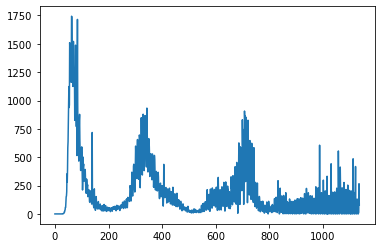

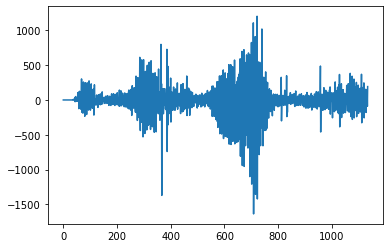

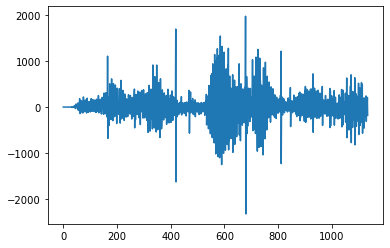

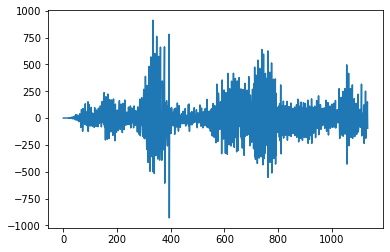

In [12]:
data_east['daily_deaths'].plot()
plt.show()

data_midwest_stationary['daily_deaths'].plot()
plt.show()

data_south_stationary['daily_deaths'].plot()
plt.show()

data_west_stationary['daily_deaths'].plot()
plt.show()

# Prophet - Univariate 

16:00:48 - cmdstanpy - INFO - Chain [1] start processing
16:00:48 - cmdstanpy - INFO - Chain [1] done processing


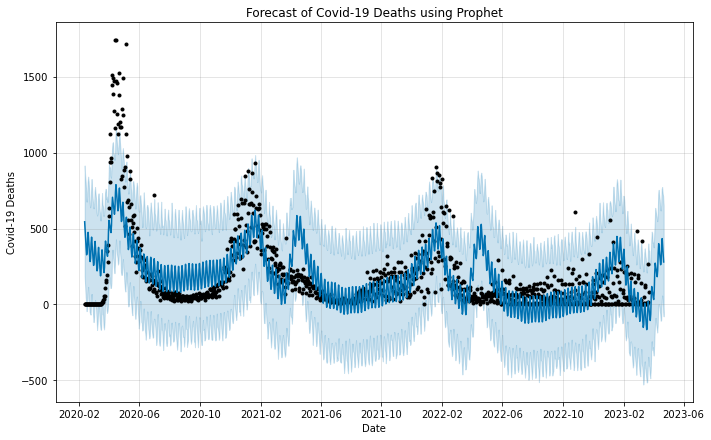

In [30]:
#using univariate data - EAST

# Assuming 'data' contains your dataset with a DateTime index and a column named 'covid_19_deaths'
# If not, replace 'covid_19_deaths' with the actual column name of your time series variable
data_prophet = data_east.reset_index()  # Reset index to use 'ds' as the time column
data_prophet = data_prophet.rename(columns={'date': 'ds', 'daily_deaths': 'y'})  # Rename columns for Prophet

# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.05,
    holidays=None,  # You can specify holidays here
    seasonality_mode='additive',
    interval_width=0.95
)

# Fit the model to the data
model.fit(data_prophet)

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet')
plt.show()

In [31]:
#Printing Model Summary 


# Convert 'ds' column in actual data to datetime
data_prophet['ds'] = pd.to_datetime(data_prophet['ds'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column
merged_data = pd.concat([data_prophet.set_index('ds'), forecast.set_index('ds')], axis=1, join='inner').reset_index()

# Calculate performance metrics
mse = mean_squared_error(merged_data['y'], merged_data['yhat'])
mae = mean_absolute_error(merged_data['y'], merged_data['yhat'])
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 35364.434465324266
Mean Absolute Error (MAE): 131.57457003554308
Root Mean Squared Error (RMSE): 188.05433912921092


16:00:49 - cmdstanpy - INFO - Chain [1] start processing
16:00:50 - cmdstanpy - INFO - Chain [1] done processing


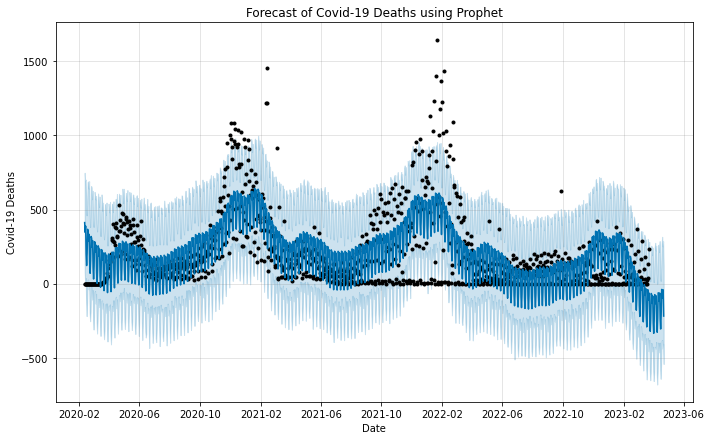

In [32]:
#using univariate data - MIDWEST


# Assuming 'data' contains your dataset with a DateTime index and a column named 'covid_19_deaths'
# If not, replace 'covid_19_deaths' with the actual column name of your time series variable
data_prophet = data_midwest.reset_index()  # Reset index to use 'ds' as the time column
data_prophet = data_prophet.rename(columns={'date': 'ds', 'daily_deaths': 'y'})  # Rename columns for Prophet

# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.05,
    holidays=None,  # You can specify holidays here
    seasonality_mode='additive',
    interval_width=0.95
)

# Fit the model to the data
model.fit(data_prophet)

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet')
plt.show()

In [33]:
#Printing Model Summary 

# Convert 'ds' column in actual data to datetime
data_prophet['ds'] = pd.to_datetime(data_prophet['ds'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column
merged_data = pd.concat([data_prophet.set_index('ds'), forecast.set_index('ds')], axis=1, join='inner').reset_index()

# Calculate performance metrics
mse = mean_squared_error(merged_data['y'], merged_data['yhat'])
mae = mean_absolute_error(merged_data['y'], merged_data['yhat'])
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 29912.64412153853
Mean Absolute Error (MAE): 124.54443439896573
Root Mean Squared Error (RMSE): 172.95272221488312


16:00:50 - cmdstanpy - INFO - Chain [1] start processing
16:00:51 - cmdstanpy - INFO - Chain [1] done processing


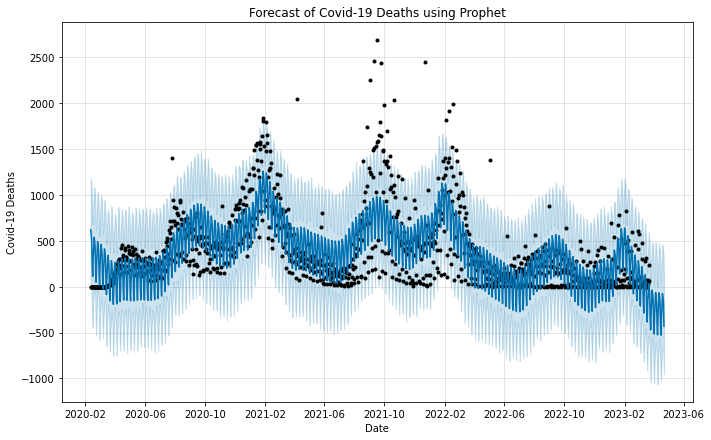

In [34]:
#using univariate data - SOUTH


# Assuming 'data' contains your dataset with a DateTime index and a column named 'covid_19_deaths'
# If not, replace 'covid_19_deaths' with the actual column name of your time series variable
data_prophet = data_south.reset_index()  # Reset index to use 'ds' as the time column
data_prophet = data_prophet.rename(columns={'date': 'ds', 'daily_deaths': 'y'})  # Rename columns for Prophet

# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.05,
    holidays=None,  # You can specify holidays here
    seasonality_mode='additive',
    interval_width=0.95
)

# Fit the model to the data
model.fit(data_prophet)

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet')
plt.show()

In [35]:
#Printing Model Summary 

# Convert 'ds' column in actual data to datetime
data_prophet['ds'] = pd.to_datetime(data_prophet['ds'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column
merged_data = pd.concat([data_prophet.set_index('ds'), forecast.set_index('ds')], axis=1, join='inner').reset_index()

# Calculate performance metrics
mse = mean_squared_error(merged_data['y'], merged_data['yhat'])
mae = mean_absolute_error(merged_data['y'], merged_data['yhat'])
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 77218.75537674491
Mean Absolute Error (MAE): 205.23103325844582
Root Mean Squared Error (RMSE): 277.8826287783116


16:00:51 - cmdstanpy - INFO - Chain [1] start processing
16:00:52 - cmdstanpy - INFO - Chain [1] done processing


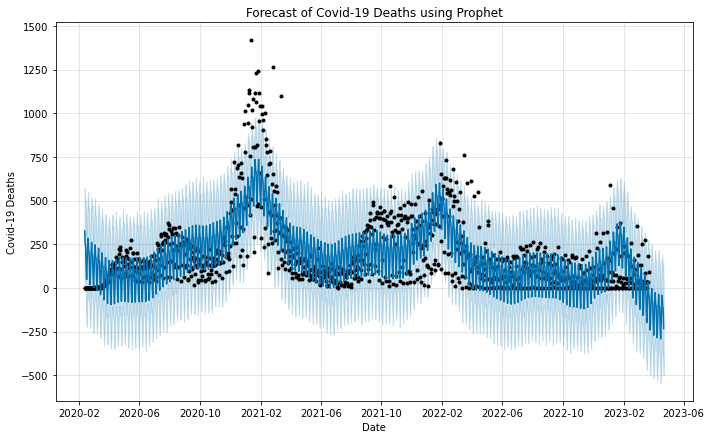

In [36]:
#using univariate data - WEST

# Assuming 'data' contains your dataset with a DateTime index and a column named 'covid_19_deaths'
# If not, replace 'covid_19_deaths' with the actual column name of your time series variable
data_prophet = data_west.reset_index()  # Reset index to use 'ds' as the time column
data_prophet = data_prophet.rename(columns={'date': 'ds', 'daily_deaths': 'y'})  # Rename columns for Prophet

# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.05,
    holidays=None,  # You can specify holidays here
    seasonality_mode='additive',
    interval_width=0.95
)

# Fit the model to the data
model.fit(data_prophet)

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet')
plt.show()

In [37]:
#Printing Model Summary 

# Convert 'ds' column in actual data to datetime
data_prophet['ds'] = pd.to_datetime(data_prophet['ds'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column
merged_data = pd.concat([data_prophet.set_index('ds'), forecast.set_index('ds')], axis=1, join='inner').reset_index()

# Calculate performance metrics
mse = mean_squared_error(merged_data['y'], merged_data['yhat'])
mae = mean_absolute_error(merged_data['y'], merged_data['yhat'])
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 17406.57063020032
Mean Absolute Error (MAE): 96.81048309627664
Root Mean Squared Error (RMSE): 131.93396314141526


# Seasonal ARIMA

<AxesSubplot:>

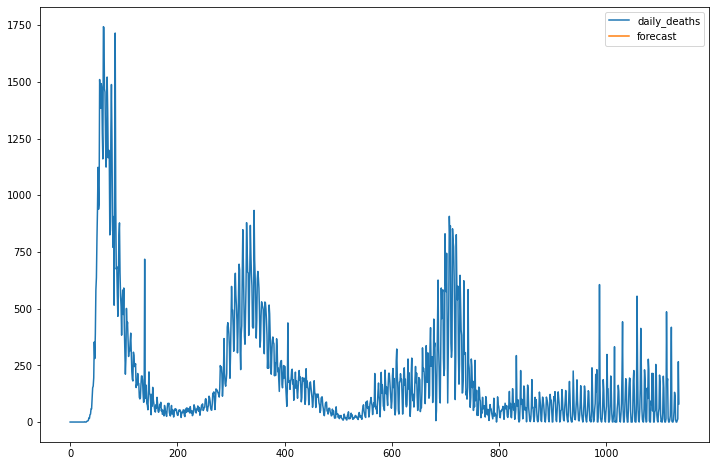

In [43]:
model=sm.tsa.statespace.SARIMAX(data_east_stationary['daily_deaths'],order=(5, 1, 4),seasonal_order=(1,1,1,12))
results=model.fit()

data_east['forecast']=results.predict(start=90,end=103,dynamic=True)
data_east[['daily_deaths','forecast']].plot(figsize=(12,8))

In [49]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the forecasted period
start_idx = 90
end_idx = 103

# Slice the actual data to match the forecasted period
actual_data = data_east['daily_deaths'].iloc[start_idx:end_idx]

# Slice the forecasted values to match the forecasted period
forecast_values = data_east['daily_deaths'].iloc[start_idx:end_idx]

# Calculate performance metrics
mse = mean_squared_error(actual_data, forecast_values)
mae = mean_absolute_error(actual_data, forecast_values)
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.0
Mean Absolute Error (MAE): 0.0
Root Mean Squared Error (RMSE): 0.0


<AxesSubplot:>

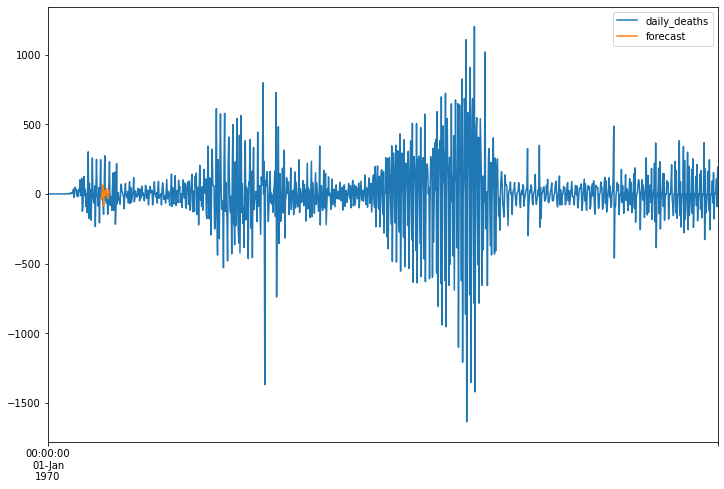

In [52]:
model=sm.tsa.statespace.SARIMAX(data_midwest_stationary['daily_deaths'],order=(2, 0, 3),seasonal_order=(1,1,1,12))
results=model.fit()

data_midwest_stationary['forecast']=results.predict(start=90,end=103,dynamic=True)
data_midwest_stationary[['daily_deaths','forecast']].plot(figsize=(12,8))

In [53]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the forecasted period
start_idx = 90
end_idx = 103

# Slice the actual data to match the forecasted period
actual_data = data_midwest_stationary['daily_deaths'].iloc[start_idx:end_idx]

# Slice the forecasted values to match the forecasted period
forecast_values = data_midwest['daily_deaths'].iloc[start_idx:end_idx]

# Calculate performance metrics
mse = mean_squared_error(actual_data, forecast_values)
mae = mean_absolute_error(actual_data, forecast_values)
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 137712.15384615384
Mean Absolute Error (MAE): 347.2307692307692
Root Mean Squared Error (RMSE): 371.09588228132344


<AxesSubplot:>

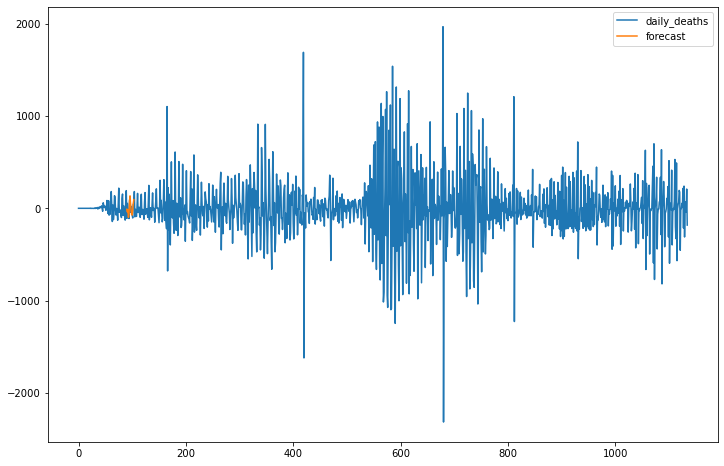

In [54]:
model=sm.tsa.statespace.SARIMAX(data_south_stationary['daily_deaths'],order=(5, 0, 2),seasonal_order=(1,1,1,12))
results=model.fit()

data_south_stationary['forecast']=results.predict(start=90,end=103,dynamic=True)
data_south_stationary[['daily_deaths','forecast']].plot(figsize=(12,8))

In [55]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the forecasted period
start_idx = 90
end_idx = 103

# Slice the actual data to match the forecasted period
actual_data = data_south_stationary['daily_deaths'].iloc[start_idx:end_idx]

# Slice the forecasted values to match the forecasted period
forecast_values = data_south['daily_deaths'].iloc[start_idx:end_idx]

# Calculate performance metrics
mse = mean_squared_error(actual_data, forecast_values)
mae = mean_absolute_error(actual_data, forecast_values)
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 103274.15384615384
Mean Absolute Error (MAE): 291.38461538461536
Root Mean Squared Error (RMSE): 321.36296277908855


<AxesSubplot:>

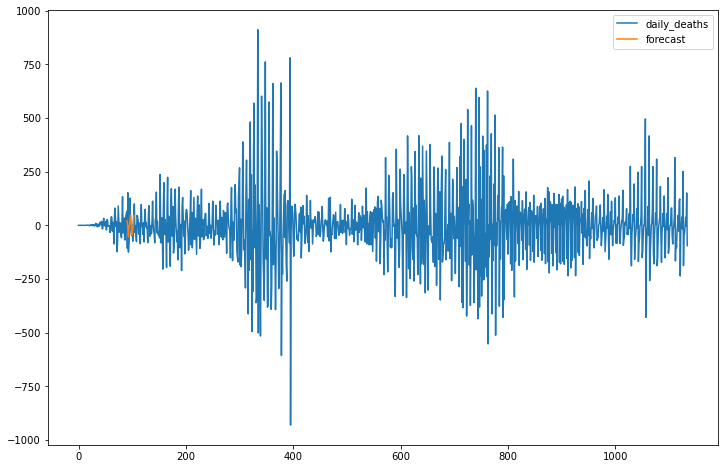

In [56]:
model=sm.tsa.statespace.SARIMAX(data_west_stationary['daily_deaths'],order=(5, 0, 2),seasonal_order=(1,1,1,12))
results=model.fit()

data_west_stationary['forecast']=results.predict(start=90,end=103,dynamic=True)
data_west_stationary[['daily_deaths','forecast']].plot(figsize=(12,8))

In [57]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the forecasted period
start_idx = 90
end_idx = 103

# Slice the actual data to match the forecasted period
actual_data = data_west_stationary['daily_deaths'].iloc[start_idx:end_idx]

# Slice the forecasted values to match the forecasted period
forecast_values = data_west['daily_deaths'].iloc[start_idx:end_idx]

# Calculate performance metrics
mse = mean_squared_error(actual_data, forecast_values)
mae = mean_absolute_error(actual_data, forecast_values)
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 41529.846153846156
Mean Absolute Error (MAE): 171.53846153846155
Root Mean Squared Error (RMSE): 203.78872921201054


# Also Arima 

In [ ]:
#East

data_east_stationary.index = pd.to_datetime(data_east_stationary.index)

# Split the data into training and testing sets
train_size = int(len(data_east_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_east_stationary.iloc[:train_size], data_east_stationary.iloc[train_size:]

# Fit ARIMA model
# Example order (p, d, q)
model = ARIMA(train_data['daily_deaths'], order=(5,1,0))  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
#Midwest 

data_midwest_stationary.index = pd.to_datetime(data_midwest_stationary.index)

# Split the data into training and testing sets
train_size = int(len(data_midwest_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_midwest_stationary.iloc[:train_size], data_midwest_stationary.iloc[train_size:]

# Fit ARIMA model
# Example order (p, d, q)
model = ARIMA(train_data['daily_deaths'], order=(5,1,0))  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
#West 

data_west_stationary.index = pd.to_datetime(data_west_stationary.index)

# Split the data into training and testing sets
train_size = int(len(data_west_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_west_stationary.iloc[:train_size], data_west_stationary.iloc[train_size:]

# Fit ARIMA model
# Example order (p, d, q)
model = ARIMA(train_data['daily_deaths'], order=(5,1,0))  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
#South

data_south_stationary.index = pd.to_datetime(data_south_stationary.index)

# Split the data into training and testing sets
train_size = int(len(data_south_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_south_stationary.iloc[:train_size], data_south_stationary.iloc[train_size:]

# Fit ARIMA model
# Example order (p, d, q)
model = ARIMA(train_data['daily_deaths'], order=(5,1,0))  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# Arima

In [58]:
import warnings
import statsmodels.api 
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore",category =  UserWarning)
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)

if 1:
    import statsmodels.api as sm

    results=[]
    for p in range(1,3):
        for q in range(1,3):
            for P in range(1,3):
                for Q in range(1,3):
                    print(p,q,P,Q)
                    model=sm.tsa.statespace.SARIMAX(data_east['daily_deaths'],order=(p,1,q), seasonal_order=(P,1,Q,12)).fit()
                    results.append([p,q,P,Q,model.aic])

1 1 1 1
1 1 1 2
1 1 2 1
1 1 2 2
1 2 1 1
1 2 1 2
1 2 2 1
1 2 2 2
2 1 1 1
2 1 1 2
2 1 2 1
2 1 2 2
2 2 1 1
2 2 1 2
2 2 2 1
2 2 2 2


Mean Squared Error (Train): 6544.456879308068
Mean Absolute Error (Train): 48.45338293533951
Mean Squared Error (Test): 13485.22574747086
Mean Absolute Error (Test): 69.85847400139016
Root Mean Squared Error (RMSE): 116.12590472186152


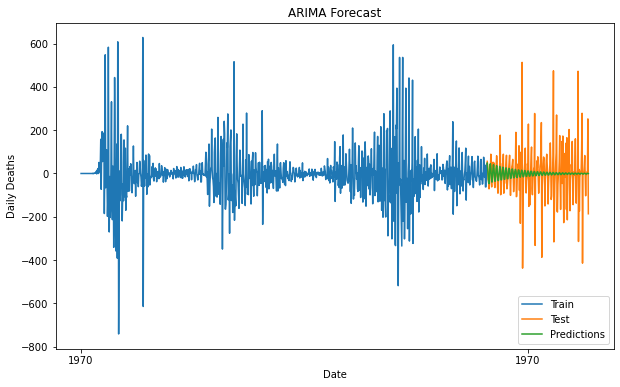

In [59]:
#EAST

data_east_stationary.index = pd.to_datetime(data_east_stationary.index)

# Split the data into training and testing sets
train_size = int(len(data_east_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_east_stationary.iloc[:train_size], data_east_stationary.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data['daily_deaths'], order=(5,1,4))  
fitted_model = model.fit()

# Make predictions
predictions_train = fitted_model.predict(start=train_data.index[0], end=train_data.index[-1])
predictions_test = fitted_model.forecast(steps=len(test_data))

# Evaluate the model - train 
mse_train = mean_squared_error(train_data['daily_deaths'], predictions_train)
print("Mean Squared Error (Train):", mse_train)

mae_train = mean_absolute_error(train_data['daily_deaths'], predictions_train)
print("Mean Absolute Error (Train):", mae_train)

# Evaluate the model - test
mse_test = mean_squared_error(test_data['daily_deaths'], predictions_test)
print("Mean Squared Error (Test):", mse_test)

mae_test = mean_absolute_error(test_data['daily_deaths'], predictions_test)
print("Mean Absolute Error (Test):", mae_test)

# Compute RMSE
rmse = np.sqrt(mse_test)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions_test, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11180.801, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11180.471, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=11177.523, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=11073.077, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=11000.209, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11118.625, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=10983.361, Time=0.24 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=11091.601, Time=0.06 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=10909.004, Time=0.27 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=11004.371, Time=0.08 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=10822.811, Time=0.41 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=10843.810, Time=0.10 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=10645.434, Time=0.80 sec
 ARIMA(4,0,2)(0,0,0)[0]  

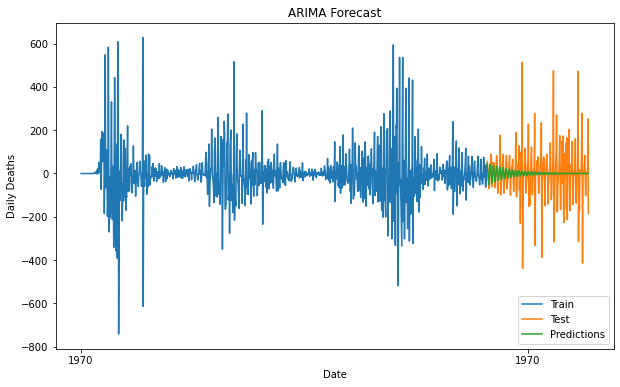

In [60]:
# Fit auto-ARIMA model
auto_model = auto_arima(train_data['daily_deaths'], seasonal=False, trace=True)

# Get the optimal order
order = auto_model.order
print("Optimal ARIMA Order:", order)

# Fit ARIMA model with the optimal order
model = ARIMA(train_data['daily_deaths'], order=order)  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [61]:
#EAST
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           daily_deaths   No. Observations:                  908
Model:                 ARIMA(5, 0, 4)   Log Likelihood               -5281.400
Date:                Tue, 20 Feb 2024   AIC                          10584.800
Time:                        16:17:40   BIC                          10637.724
Sample:                    01-01-1970   HQIC                         10605.009
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0785      1.344      0.058      0.953      -2.557       2.713
ar.L1          0.4833      0.041     11.846      0.000       0.403       0.563
ar.L2         -1.0794      0.037    -29.211      0.000      -1.152      -1.007
ar.L3          0.2352      0.054      4.368      0.000       0.130       0.341
ar.L4         -0.5870      0.024    -24.869      0.000      -0.633      -0.541
ar.L5         -0.3385      0.029    -11.794      0.000      -0.395      -0.282
ma.L1         -0.9610      0.040    -24.214      0.000      -1.039      -0.883
ma.L2          1.1038      0.053     20.810      0.000       1.000       1.208
ma.L3         -0.6773      0.057    -11.847      0.000      -0.789      -0.565
ma.L4          0.5376      0.030     18.136      0.000       0.480       0.596
sigma2      6596.3000    145.825     45.234      0.000    6310.488    6882.112
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              3609.72
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Midwest 

data_midwest_stationary.index = pd.to_datetime(data_midwest_stationary.index)

# Split the data into training and testing sets
train_size = int(len(data_midwest_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_midwest_stationary.iloc[:train_size], data_midwest_stationary.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data['daily_deaths'], order=(5,1,4))  
fitted_model = model.fit()

# Make predictions
predictions_train = fitted_model.predict(start=train_data.index[0], end=train_data.index[-1])
predictions_test = fitted_model.forecast(steps=len(test_data))

# Evaluate the model - train 
mse_train = mean_squared_error(train_data['daily_deaths'], predictions_train)
print("Mean Squared Error (Train):", mse_train)

mae_train = mean_absolute_error(train_data['daily_deaths'], predictions_train)
print("Mean Absolute Error (Train):", mae_train)

# Evaluate the model - test
mse_test = mean_squared_error(test_data['daily_deaths'], predictions_test)
print("Mean Squared Error (Test):", mse_test)

mae_test = mean_absolute_error(test_data['daily_deaths'], predictions_test)
print("Mean Absolute Error (Test):", mae_test)

# Compute RMSE
rmse = np.sqrt(mse_test)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions_test, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
# Fit auto-ARIMA model
auto_model = auto_arima(train_data['daily_deaths'], seasonal=False, trace=True)

# Get the optimal order
order = auto_model.order
print("Optimal ARIMA Order:", order)

# Fit ARIMA model with the optimal order
model = ARIMA(train_data['daily_deaths'], order=order)  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
#Midwest
fitted_model.summary()

In [ ]:
#South 

data_south_stationary.index = pd.to_datetime(data_south_stationary.index)


# Split the data into training and testing sets
train_size = int(len(data_south_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_south_stationary.iloc[:train_size], data_south_stationary.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data['daily_deaths'], order=(5,1,4))  
fitted_model = model.fit()

# Make predictions
predictions_train = fitted_model.predict(start=train_data.index[0], end=train_data.index[-1])
predictions_test = fitted_model.forecast(steps=len(test_data))

# Evaluate the model - train 
mse_train = mean_squared_error(train_data['daily_deaths'], predictions_train)
print("Mean Squared Error (Train):", mse_train)

mae_train = mean_absolute_error(train_data['daily_deaths'], predictions_train)
print("Mean Absolute Error (Train):", mae_train)

# Evaluate the model - test
mse_test = mean_squared_error(test_data['daily_deaths'], predictions_test)
print("Mean Squared Error (Test):", mse_test)

mae_test = mean_absolute_error(test_data['daily_deaths'], predictions_test)
print("Mean Absolute Error (Test):", mae_test)

# Compute RMSE
rmse = np.sqrt(mse_test)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions_test, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
# Fit auto-ARIMA model
auto_model = auto_arima(train_data['daily_deaths'], seasonal=False, trace=True)

# Get the optimal order
order = auto_model.order
print("Optimal ARIMA Order:", order)

# Fit ARIMA model with the optimal order
model = ARIMA(train_data['daily_deaths'], order=order)  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
#South
fitted_model.summary()

In [ ]:
#West 

data_west_stationary.index = pd.to_datetime(data_west_stationary.index)


# Split the data into training and testing sets
train_size = int(len(data_west_stationary) * 0.8)  # 80% train, 20% test
train_data, test_data = data_west_stationary.iloc[:train_size], data_west_stationary.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train_data['daily_deaths'], order=(5,1,4))  
fitted_model = model.fit()

# Make predictions
predictions_train = fitted_model.predict(start=train_data.index[0], end=train_data.index[-1])
predictions_test = fitted_model.forecast(steps=len(test_data))

# Evaluate the model - train 
mse_train = mean_squared_error(train_data['daily_deaths'], predictions_train)
print("Mean Squared Error (Train):", mse_train)

mae_train = mean_absolute_error(train_data['daily_deaths'], predictions_train)
print("Mean Absolute Error (Train):", mae_train)

# Evaluate the model - test
mse_test = mean_squared_error(test_data['daily_deaths'], predictions_test)
print("Mean Squared Error (Test):", mse_test)

mae_test = mean_absolute_error(test_data['daily_deaths'], predictions_test)
print("Mean Absolute Error (Test):", mae_test)

# Compute RMSE
rmse = np.sqrt(mse_test)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions_test, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
# Fit auto-ARIMA model
auto_model = auto_arima(train_data['daily_deaths'], seasonal=False, trace=True)

# Get the optimal order
order = auto_model.order
print("Optimal ARIMA Order:", order)

# Fit ARIMA model with the optimal order
model = ARIMA(train_data['daily_deaths'], order=order)  
fitted_model = model.fit()

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['daily_deaths'], predictions)
print("Mean Squared Error:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Compute MAE
mae = mean_absolute_error(test_data['daily_deaths'], predictions)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['daily_deaths'], label='Train')
plt.plot(test_data.index, test_data['daily_deaths'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.title('ARIMA Forecast')
plt.legend()
plt.show() 

In [ ]:
#West 
fitted_model.summary()

# AutoArima

In [38]:
#East 

auto_model = auto_arima(data_east_stationary['daily_deaths'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

print(auto_model.summary())
n_periods=12
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Print the forecast and confidence interval
print("Forecast:", forecast)
print("Confidence Interval:", conf_int)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1135
Model:               SARIMAX(5, 0, 4)   Log Likelihood               -6607.680
Date:                Tue, 20 Feb 2024   AIC                          13235.360
Time:                        16:04:27   BIC                          13285.704
Sample:                             0   HQIC                         13254.376
                               - 1135                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3985      0.036     10.921      0.000       0.327       0.470
ar.L2         -1.0209      0.032    -31.563      0.000      -1.084      -0.958
ar.L3          0.1324      0.047      2.788      0.0

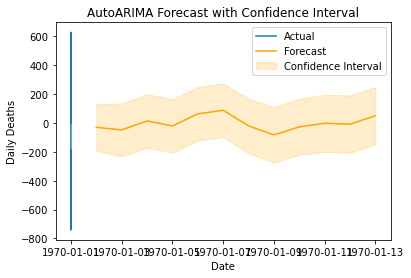

In [39]:
data_east_stationary.index = pd.to_datetime(data_east_stationary.index)

# Generate forecast_index with the appropriate frequency
forecast_index = pd.date_range(data_east_stationary.index[-1], periods=n_periods + 1, freq=data_east_stationary.index.freq)[-n_periods:]

forecast_index = pd.date_range(data_east_stationary.index[-1], periods=n_periods + 1, freq=data_east_stationary.index.freq)[-n_periods:]

plt.plot(data_east_stationary.index, data_east_stationary['daily_deaths'], label='Actual')

plt.plot(forecast_index, forecast, label='Forecast', color='orange')

plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

# Customize the plot
plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.legend()
plt.show()

In [40]:
#Midwest

auto_model = auto_arima(data_midwest_stationary['daily_deaths'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

print(auto_model.summary())
n_periods=12
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Print the forecast and confidence interval
print("Forecast:", forecast)
print("Confidence Interval:", conf_int)

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 1135
Model:             SARIMAX(2, 0, 3)x(2, 0, [1], 12)   Log Likelihood               -7400.955
Date:                              Tue, 20 Feb 2024   AIC                          14821.911
Time:                                      16:06:57   BIC                          14872.255
Sample:                                           0   HQIC                         14840.927
                                             - 1135                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4967      3.141     -0.158      0.874      -6.653       5.659
ar.L1         -1.55

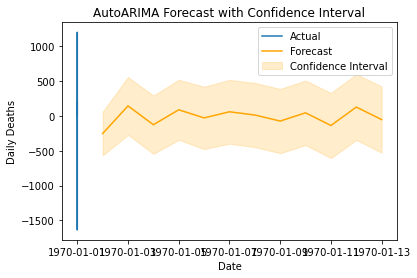

In [41]:
data_midwest_stationary.index = pd.to_datetime(data_midwest_stationary.index)

# Generate forecast_index with the appropriate frequency
forecast_index = pd.date_range(data_midwest_stationary.index[-1], periods=n_periods + 1, freq=data_midwest_stationary.index.freq)[-n_periods:]

forecast_index = pd.date_range(data_midwest_stationary.index[-1], periods=n_periods + 1, freq=data_midwest_stationary.index.freq)[-n_periods:]

plt.plot(data_midwest_stationary.index, data_midwest_stationary['daily_deaths'], label='Actual')

plt.plot(forecast_index, forecast, label='Forecast', color='orange')

plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

# Customize the plot
plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.legend()
plt.show()

In [42]:
#South

auto_model = auto_arima(data_south_stationary['daily_deaths'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

print(auto_model.summary())
n_periods=12
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Print the forecast and confidence interval
print("Forecast:", forecast)
print("Confidence Interval:", conf_int)

KeyboardInterrupt: 

In [ ]:
data_south_stationary.index = pd.to_datetime(data_south_stationary.index)

# Generate forecast_index with the appropriate frequency
forecast_index = pd.date_range(data_south_stationary.index[-1], periods=n_periods + 1, freq=data_south_stationary.index.freq)[-n_periods:]

forecast_index = pd.date_range(data_south_stationary.index[-1], periods=n_periods + 1, freq=data_south_stationary.index.freq)[-n_periods:]

plt.plot(data_south_stationary.index, data_south_stationary['daily_deaths'], label='Actual')

plt.plot(forecast_index, forecast, label='Forecast', color='orange')

plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

# Customize the plot
plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.legend()
plt.show()

In [ ]:
#West 

auto_model = auto_arima(data_west_stationary['daily_deaths'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

print(auto_model.summary())
n_periods=12
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Print the forecast and confidence interval
print("Forecast:", forecast)
print("Confidence Interval:", conf_int)

In [ ]:
data_west_stationary.index = pd.to_datetime(data_west_stationary.index)

# Generate forecast_index with the appropriate frequency
forecast_index = pd.date_range(data_west_stationary.index[-1], periods=n_periods + 1, freq=data_west_stationary.index.freq)[-n_periods:]

forecast_index = pd.date_range(data_west_stationary.index[-1], periods=n_periods + 1, freq=data_west_stationary.index.freq)[-n_periods:]

plt.plot(data_west_stationary.index, data_west_stationary['daily_deaths'], label='Actual')

plt.plot(forecast_index, forecast, label='Forecast', color='orange')

plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

# Customize the plot
plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.legend()
plt.show()

# Combined Forecast

In [ ]:
# Combine the forecasts for training set
combined_forecast_train = (easttrain_pred + westtrain_pred + southtrain_pred + midwesttrain_pred) / 4

# Evaluate and fine-tune as needed for training set
actual_values_combined_train = easttrain['daily_deaths'].values + westtrain['daily_deaths'].values + southtrain['daily_deaths'].values + midwesttrain['daily_deaths'].values

# Convert the combined forecast to a NumPy array for training set
predicted_values_combined_train = combined_forecast_train.values.flatten()

# Calculate MAE for training set
mae_combined_train = mean_absolute_error(actual_values_combined_train, predicted_values_combined_train)
print(f"Combined MAE (Training Set): {mae_combined_train}")

# Combine actual values for plotting for training set
actual_values_combined_train_df = pd.concat([easttrain['daily_deaths'], westtrain['daily_deaths'], southtrain['daily_deaths'], midwesttrain['daily_deaths']], axis=1)
actual_values_combined_train_df.columns = ['East', 'West', 'South', 'Midwest']

# Plot the actual values and combined forecast for training set
pd.concat([actual_values_combined_train_df, combined_forecast_train], axis=1).plot(figsize=(15, 5))
plt.legend(['Actual (East)', 'Actual (West)', 'Actual (South)', 'Actual (Midwest)', 'Combined Forecast (Training Set)'])
plt.show()

# Combine the forecasts for test set
combined_forecast_test = (easttest_pred + westtest_pred + southtest_pred + midwesttest_pred) / 4

# Evaluate and fine-tune as needed for test set
actual_values_combined_test = easttest['daily_deaths'].values + westtest['daily_deaths'].values + southtest['daily_deaths'].values + midwesttest['daily_deaths'].values

# Convert the combined forecast to a NumPy array for test set
predicted_values_combined_test = combined_forecast_test.values.flatten()

# Calculate MAE for test set
mae_combined_test = mean_absolute_error(actual_values_combined_test, predicted_values_combined_test)
print(f"Combined MAE (Test Set): {mae_combined_test}")

# Combine actual values for plotting for test set
actual_values_combined_test_df = pd.concat([easttest['daily_deaths'], westtest['daily_deaths'], southtest['daily_deaths'], midwesttest['daily_deaths']], axis=1)
actual_values_combined_test_df.columns = ['East', 'West', 'South', 'Midwest']

# Plot the actual values and combined forecast for test set
pd.concat([actual_values_combined_test_df, combined_forecast_test], axis=1).plot(figsize=(15, 5))
plt.legend(['Actual (East)', 'Actual (West)', 'Actual (South)', 'Actual (Midwest)', 'Combined Forecast (Test Set)'])
plt.show()
